In [12]:
from typing import TypedDict, List, Union
from langchain_core.messages import HumanMessage, AIMessage
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, START, END
from dotenv import load_dotenv

In [16]:
load_dotenv()

True

In [17]:
class AgentState(TypedDict):
    messages: List[Union[HumanMessage, AIMessage]]

In [18]:
model = ChatOpenAI(model="gpt-4o")

In [26]:
def process(state: AgentState) -> AgentState:
    """This node will solve the request your input"""
    response = model.invoke(state["messages"])

    state["messages"].append(AIMessage(content=response.content)) 
    print(f"\nAI: {response.content}")
    print("CURRENT STATE: ", state["messages"])
    
    return state

In [28]:
graph = StateGraph(AgentState)
graph.add_node("process", process)

graph.add_edge(START, "process")
graph.add_edge("process", END)

agent = graph.compile()

conversation_history = []

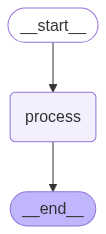

In [29]:
# %%
# In[11]:
from IPython.display import display, Image
display(Image(agent.get_graph().draw_mermaid_png()))

In [33]:
user_input = input("Enter: ")
while user_input != "exit":
    conversation_history.append(HumanMessage(content=user_input))
    result = agent.invoke({"messages": conversation_history})
    conversation_history = result["messages"]
    user_input = input("Enter: ")


AI: Hello, Pratap! What would you like to talk about today?
CURRENT STATE:  [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={}), HumanMessage(content="What's the sqaure root of 4", additional_kwargs={}, response_metadata={}), AIMessage(content='The square root of 4 is 2.', additional_kwargs={}, response_metadata={}), HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello again! How can I help you?', additional_kwargs={}, response_metadata={}), HumanMessage(content='My name is Pratap', additional_kwargs={}, response_metadata={}), AIMessage(content='Nice to meet you, Pratap! How can I assist you today?', additional_kwargs={}, response_metadata={}), HumanMessage(content='Who am I?', additional_kwargs={}, response_metadata={}), AIMessage(content="You mentioned that your name is Pratap. Beyond that, I don't have any additional in

In [34]:
with open("logging.txt", "w") as file:
    file.write("Your Conversation Log:\n")
    
    for message in conversation_history:
        if isinstance(message, HumanMessage):
            file.write(f"You: {message.content}\n")
        elif isinstance(message, AIMessage):
            file.write(f"AI: {message.content}\n\n")
    file.write("End of Conversation")

print("Conversation saved to logging.txt")

Conversation saved to logging.txt
